# Linear Regression

Predictive modeling, using a data samples to make predictions about unobserved or future events, is a common data analytics task. Predictive modeling is considered to be a form of machine learning.

Linear regression is a technique for predicting a response/dependent variable based on one or more explanatory/independent variables, or features. The term "linear" refers to the fact that the method models data as a linear combination of explanatory variables.  

Linear regression, in its simplest form, fits a straight line to the response variable data so that the line minimizes the squared differences (also called errors or residuals) between the actual obbserved response and the predicted point on the line. Since linear regression fits the observed data with a line, it is most effective when the response and the explanatory variable do have a linear relationship.

## Motivating Example: Housing Data
In this notebook, we will generate a model for predicting the sale price of houses, given information about the house features. To train this model we will be using housing data from the USA.

### Install Relevant Libraries

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install matplotlib
#!pip install seaborn
#!pip install statsmodels

### Import Libraries

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Needed to show plots inline for notebooks
%matplotlib inline

## Load the data

First, let's load the data into a pandas dataframe.

In [3]:
housingDF = pd.read_csv('USA_housing.csv')
housingDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
housingDF.columns.values

array(['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price', 'Address'], dtype=object)

The **features**?
- *Avg. Area Income*: The average income of the residents of the city the house is located in.
- *Avg. Area House Age*: The averge age of houses in the same city
- *Avg. Area Number of Rooms*: The average number of rooms for houses in the same city
- *Avg. Area Number of Bedrooms*: The average number of bedrooms for houses in the same city
- *Area Population*: The population of the city the house is located in
- *Address*: The address of the house

What is the **response**?
- *Price*: The price the house was/will be sold at

### Shape of dataframe
Now let's look at the shape of the dataframe:

In [5]:
# print the size of the DataFrame object, i.e., the size of the dataset
housingDF.shape

(5000, 7)

There are 5000 **observations**, 6 **features** and 1 **target** variable.

We can also get more information from the dataframe by using pandas *info()* and *describe()* functions.

In [6]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
housingDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


From the above, we can discren that there is no missing data (i.e., no null elements in any columns). We can also see some basic statistics about the dataframe. For example, the lowest selling price of the houses in the dataframe is $\$$15,938.66, and the highest price is $\$$2,469,066.

## Data Exploration
Now, let's do some data exploration of our data!

### pairplot
A pairplot plots pairwise relationships between the variables. The diagonal plots show the univariate distribution of the data.

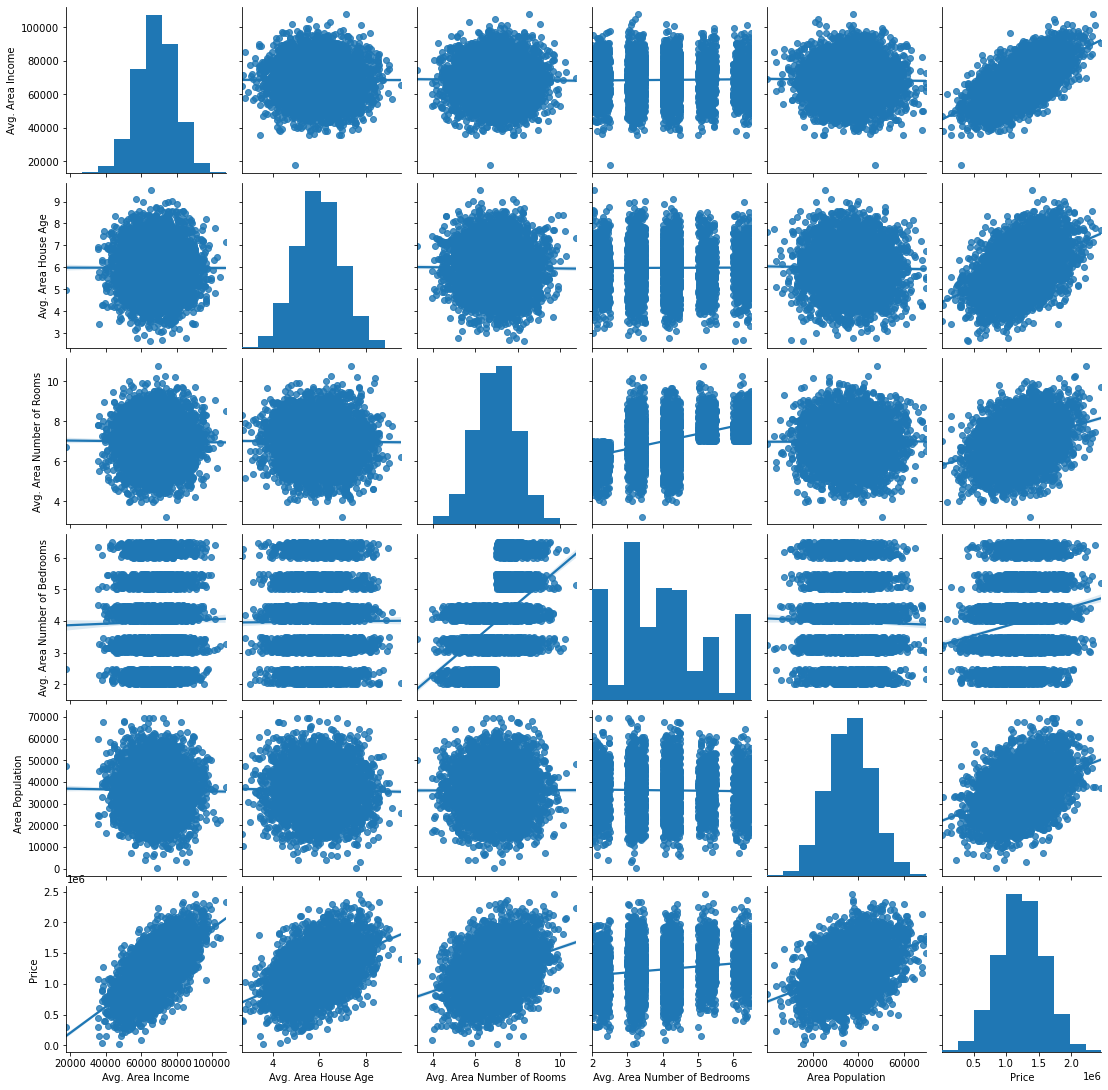

In [8]:
sns.pairplot(housingDF, kind='reg')

From here, we can see that the average area income has the strongest linear relationship with the price of all the features. We can also see that several of the features and the target variable have normal distributions.

### distplot
We can get the distribution for only one variable by using the seaborn distplot function. Let's look at the distribution of the target variable, price.

<AxesSubplot:xlabel='Price'>

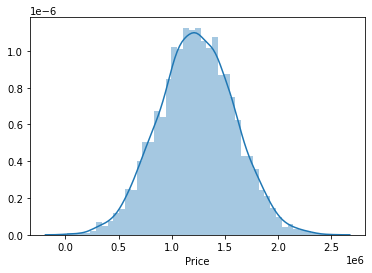

In [9]:
sns.distplot(housingDF.Price)

As seen above, this plot has a fairly uniform distribution with a mean at around 1.2 million.

### heatmap
We can also look at the correlation between the features and the target variable using seaborn's heatmap function.

We can mask the upper right triangle as they are identical to the lower left triangle. The diagonal also is irrelevant as its the correlation of a feature with itself.

<AxesSubplot:>

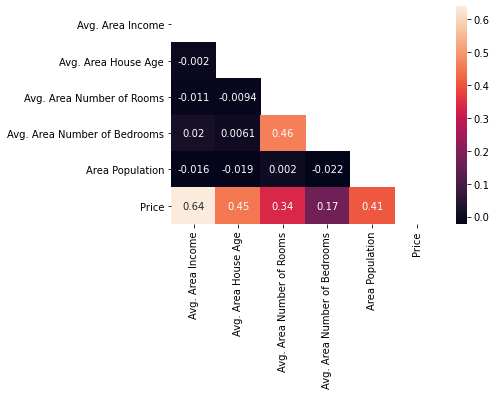

In [10]:
mask = np.zeros_like(housingDF.corr()*-1)
mask[np.triu_indices_from(mask)] = True

#fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(housingDF.corr(), mask=mask, annot=True)

As expected, average area income has the highest positive correlation with the target variable. Average number of bedrooms has the lowest positive correlation. None of the features are negatively correlated with the target variable. 

## Data Cleaning
Now let's clean the data a bit. As mentioned before, there is no missing data. We can verify this by plotting a heatmap of the nulls in the dataset.

<AxesSubplot:>

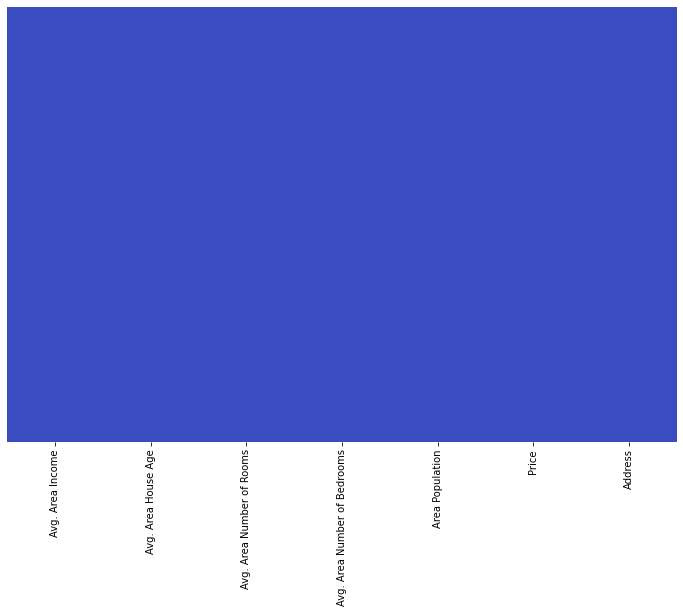

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(housingDF.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

As expected, there are no red lines indicating NaNs in the dataset.

### Address column
The address column is in a text format so it cannot be fed into a scikit-learn model. This feature could be parsed to create new target variables, such as the type of street, if its a PO box, etc. For this example we will just drop the column and see how the model performs given the remaining features.

In [12]:
housingDF['Address'].head()

0    208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1    188 Johnson Views Suite 079\nLake Kathleen, CA...
2    9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                            USS Barnett\nFPO AP 44820
4                           USNS Raymond\nFPO AE 09386
Name: Address, dtype: object

In [13]:
# Drop Address column
housingDF.drop('Address',axis=1,inplace=True)

## Training a Linear Regression Model

### Simple Linear Regression

Simple linear regression is an approach for modeling the relationship between a **dependent variable** (a "response") and an **explanatory variable**, also known as a "predictor" or "feature". The relationship is modeled as a linear function $y = \beta_0 + \beta_1x$ whose parameters are estimated from the available data.

In the equation above:
- $y$ is called the response, regressand, endogenous variable, dependent variable, etc.
- $x$ is the feature, regressor, exogenous variable, explanatory variables, predictor, etc.
- $\beta_0$ is known as the intercept
- $\beta_1$ is the regression coefficient, effect, etc. 

Together, $\beta_0$ and $\beta_1$ are called **paramaters**, **model/regression coefficients**, or **effects**. To create a model, we must discover/learn/estimate the values of these coefficients. 

### Estimating/Learning Model/Regression Coefficients
Regression coefficients are estimated using a variety of methods. The **least squares method**, which finds the line which minimizes the **sum of squared residuals** (or "sum of squared errors") is among the most oftenly used.

In the pictures below:
- The blue dots are the **observed values** of x and y.
- The red line is the **least squares line**.
- The **residuals** are the distances between the observed values and the least squares line.

- $\beta_0$ is the **intercept** of the least squares line (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** of the least squares line, i.e. the ratio of the vertical change (in $y$) and the horizontal change (in $x$).

We can use the  **statsmodels** package to estimate the model coefficients for avg. area income vs. the price).

**Note**: We rename the *Avg. Area Income* column to *avgAreaIncome* to work with ols function from statsmodel.

In [14]:
import statsmodels.formula.api as sf

#create a model with Sales as dependent variable and TV as explanatory variable
model = sf.ols('Price ~ avgAreaIncome', housingDF.rename(index=str, columns={"Avg. Area Income":"avgAreaIncome"}))

#fit the model to the data 
fitted_model = model.fit()

# print the coefficients
print(fitted_model.params)

Intercept       -221579.478206
avgAreaIncome        21.195483
dtype: float64


We can now pull the $\beta$ values from the params argument:

In [15]:
b0 = fitted_model.params[0]
b1 = fitted_model.params[1]

### Interpreting Model Coefficients

Q: How do we interpret the coefficient ($\beta_1$) of the explanatory variable "Avg. Area Income"?

A: A unit ($\$$1 USD) increase in avg. area income is **associated with** a 21.195483 unit ($\$$1 USD) increase in Price, i.e., an additional $\$$1000 of avg. area income is **associated with** an increase in house price of ~$\$$21,195.48.

Note that it is, in general, possible to have a negative effect, e.g., an increase in avg area income can be associated with a **decrease** in house prices. $\beta_1$ would be **negative** in this case.

### Using the Model for Prediction

Can we use the model we develop to predict housing prices? For example, if the average area income of area is \$100,000, what would the model predict as the house price?

$$price = \beta_0 + \beta_1\times avg. area\ income$$

In [16]:
print("y = {} + {}*(avg. area income)".format(round(b0,3),round(b1,3)))

y = -221579.478 + 21.195*(avg. area income)


In [17]:
y = b0 + b1*100000
print ("The predicted house price for a house in the region with a $100,000 average income is ${}".format(round(y,2)))

The predicted house price for a house in the region with a $100,000 average income is $1897968.84


#### Using statsmodel to predict
We can also make this prediction using the stats model directly.

In [18]:
# create a DataFrame to use with the Statsmodels formula interface
avg_area_income = pd.DataFrame({'avgAreaIncome': [100000]})

#check the newly created DataFrame
avg_area_income.head()

,avgAreaIncome
0,100000


In [19]:
# use the model created above to predict the price
sales = fitted_model.predict(pd.DataFrame({'avgAreaIncome':[100000]}))
print(sales)

0    1.897969e+06
dtype: float64


As expected, the stats model returned the same result as the linear functon above.

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of avg. area income**, and then use the predicted values to plot the least squares line:

In [20]:
# create a DataFrame with the minimum and maximum values of TV ad money
avg_area_income = pd.DataFrame({'avgAreaIncome': [housingDF['Avg. Area Income'].min(), housingDF['Avg. Area Income'].max()]})
print(avg_area_income.head())

   avgAreaIncome
0   17796.631190
1  107701.748378


In [21]:
# make predictions for those x values and store them
price_predictions = fitted_model.predict(avg_area_income)
print(price_predictions)

0    1.556287e+05
1    2.061211e+06
dtype: float64


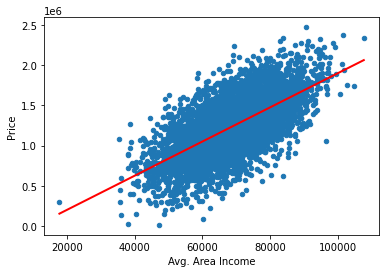

In [22]:
# plot the observed data
housingDF.plot(kind='scatter', x='Avg. Area Income', y='Price')

# plot the least squares line
plt.plot(avg_area_income, price_predictions, c='red', linewidth=2)

## Confidence in Linear Regression Models

**Q:** Is linear regression a high bias/low variance model, or a low variance/high bias model?

**A:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). (A low variance is a useful characteristic when limited training data is available.)

We can use Statsmodels to calculate 95% confidence intervals for the model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [23]:
# print the confidence intervals for the model coefficients
print(fitted_model.conf_int())

                           0              1
Intercept     -270590.702759 -172568.253653
avgAreaIncome      20.489332      21.901634


Since we only have a **single sample of data**, and not the **entire population** the "true" value of the regression coefficient is either within this interval or it isn't, but there is no way to actually know. 

We estimate the regression coefficient using the data we have, and then we characterize the uncertainty about that estimate by giving a confidence interval, an interval that will "probably" contain the  value coefficient. Note that there is no probability associated with the true value of the regression coefficient being in the given confidence interval!

Also note that using 95% confidence intervals is simply a convention. One can create 90% confidence intervals (narrower intervals), 99% confidence intervals (wider intervals), etc.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [24]:
# print the p-values for the model coefficients
fitted_model.pvalues

Intercept        1.064127e-18
avgAreaIncome    0.000000e+00
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model to the available data is by calculating the **R-squared** (a.k.a, "coefficient of determination") value. 

R-squared has several interpretations:
(1) R-squared ×100 percent of the variation in the dependent variable ($y$) is reduced by taking into account predictor $x$
(2) R-squared is the proportion of variance in the observed data that is "explained" by the model.

R-squared is between 0 and 1, and, generally speaking, higher is considered to be better because more variance is accounted for ("explained") by the model.

Note, however, that R-squared does not indicate whether a regression model is actually good. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!

One should evaluate the adequacy of a model by looking at R-squared values as well as residual (i.e., observed value - fitted value) plots, other model statistics, and subject area knowledge.

The R-squared value for our simple linear regression model is:

In [25]:
# print the R-squared value for the model
fitted_model.rsquared

0.4092593070338846

Is that a "good" R-squared value? One cannot generally assess that. What a "good" R-squared value is depends on the domain and therefore R-squared is most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can be extended to include multiple explanatory variables:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different predictor/feature, and each predictor has its own coefficient. In our case:

$y = \beta_0 + \beta_1 \times avgAreaIncome + \beta_2 \times avgAreaHouseAge + \beta_3 \times avgAreaNumOfRooms + \beta_4 \times avgAreaNumOfBedrooms$

Let's use Statsmodels to estimate these coefficients:

In [26]:
# create a model with all the features

# Rename the columns since ols doesn't take spaces
tempDF = housingDF.rename(index=str,columns={
        "Avg. Area Income": "avgAreaIncome",
        "Avg. Area House Age": "avgAreaHouseAge",
        "Avg. Area Number of Rooms" : "avgAreaNumOfRooms",
        "Avg. Area Number of Bedrooms": "avgAreaNumOfBedrooms",
        "Area Population": "areaPopulation"
    })

multi_model = sf.ols(formula='Price ~ avgAreaIncome + avgAreaHouseAge + avgAreaNumOfRooms + avgAreaNumOfBedrooms', data=tempDF)
fitted_multi_model = multi_model.fit()

# print the coefficients
print(fitted_multi_model.params)

Intercept              -2.057439e+06
avgAreaIncome           2.135808e+01
avgAreaHouseAge         1.628283e+05
avgAreaNumOfRooms       1.229039e+05
avgAreaNumOfBedrooms   -1.853639e+03
dtype: float64


How do we interpret the coefficients? For a given amount of avg. area house age, avg. area number of rooms, and avg. area number of bedrooms, a **unit** ($\$$1 USD) in avg. area income is associated with an **increase in housing price by ~$\$$21.36 USD.

Other information is available in the model summary output:

In [27]:
# print a summary of the fitted model
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3476.
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:38:57   Log-Likelihood:                -67640.
No. Observations:                5000   AIC:                         1.353e+05
Df Residuals:                    4995   BIC:                         1.353e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.057e+06   2.92e+04    -70.511      0.000   -2.11e+06      -2e+06
avgAreaIncome           21.3581      0.241     88.579      0.000      20.885      21.831
avgAreaHouseAge       1.628e+05   2591.095     62.842      0.000    1.58e+05    1.68e+05
avgAreaNumOfRooms     1.229e+05   2881.688     42.650      0.000    1.17e+05    1.29e+05
avgAreaNumOfBedrooms -1853.6388   2348.860     -0.789      0.430   -6458.435    2751.157
==============================================================================
Omnibus:                        0.962   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.909
Skew:                           0.024   Prob(JB):                        0.635
Kurtosis:                       3.045   Cond. No.                     7.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- avg area income, avg area house age, and avg area number of rooms have significant **p-values**, whereas avg. area number of bedrooms does not. Thus we reject the former (that there is no association between those features and house Price), and fail to reject the null hypothesis for avg. area number of bedrooms.
- avg area income, avg area house age, and avg area number of rooms are all **positively associated** with housing prices, whereas avg. area number of bedrooms is **negatively associated** with Price.
- This model has a higher **R-squared** (0.736) than the previous model, which means that this model provides a better fit to the data than a model that only includes avg. area income.

## Feature Selection

How do I decide **which features to include** in a linear model? 
- Try different models and check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the predictors/features being independent), and if those assumptions are violated (which they usually are), R-squared are less reliable.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize well to new data. For example:

In [28]:
# only include avgAreaIncome and avgAreaHouseAge in the model
model1 = sf.ols(formula='Price ~ avgAreaIncome + avgAreaHouseAge', data=tempDF).fit()
print(model1.rsquared)

0.6152185122747899


In [29]:
# add avgAreaNumOfRooms to the model
model2 = sf.ols(formula='Price ~ avgAreaIncome + avgAreaHouseAge + avgAreaNumOfRooms', data=tempDF).fit()
print(model2.rsquared)

0.7356603185073659


**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but this approach has its own set of issues.

Is there a better approach to feature selection? **Cross-validation**, which provides a more reliable estimate of out-of-sample error, and thus is better at choosing which model will better **generalize** to out-of-sample data. Cross-validation can be applied to any type of model, not just linear models.

## Linear Regression in scikit-learn

The work done using Statsmodels can also be using scikit-learn. 

To evaluate our model, we first split our data into two arrays: (1) X array with our features, and (2) y array with our target variable (Price). 

In [30]:
X = housingDF.drop('Price',axis=1)
y = housingDF.Price

### Train Test Split
To evaluate our model, we will split our data into a training and testing set. We will train our model on the training set and then use the trained model to make predictions on the testing set. The random_state argument is set for reproducability.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Create and train model

In [32]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)# print intercept and coefficients

LinearRegression()

### Model Parameters
Let's look at the model parameters for our model:

In [33]:
print("Intercept: {}".format(lm.intercept_))
print("Coefficients: {}".format(lm.coef_))

Intercept: -2641372.66730168
Coefficients: [2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


In [34]:
# pair the feature names with the coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


### Make predictions
Let's predict the housing price given the following features:
- *Avg. Area Income* = \$65000 
- *Avg. Area House Age* = 7
- *Avg. Area Number of Rooms* = 7
- *Avg. Area Number of Bedrooms* = 2
- *Area Population* =  35000

In [35]:
# predict for a new observation
lm.predict([[65000, 7, 7, 2, 35000]])

array([1305678.36273612])

### Check fit of training

In [36]:
# calculate the R-squared for our fit
lm.score(X_train, y_train)

0.9177641115595528

### Make predictions on testing set

Let's grab predictions on our test set and see how well the model performs.

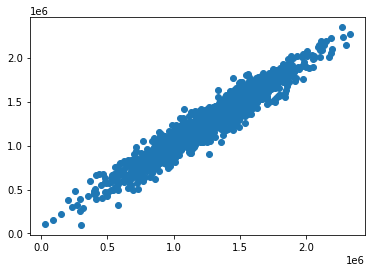

In [37]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

#### Residual histogram
Let's plot our error in the form of a histogram.

<AxesSubplot:xlabel='Price'>

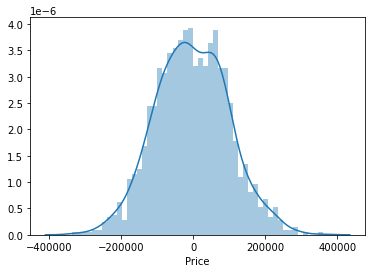

In [38]:
sns.distplot((y_test-predictions),bins=50)

### Alternative Evaluation Metrics

## Regression Evaluation Metrics


Here are 3 common evaluation metrics:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

The above are considered **loss functions**, and our goal is to minimize them.

We do not need to code these loss functions themselves as they exist in the sklearn metrics library:

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81257.55795856066
MSE: 10169125565.897734
RMSE: 100842.08231635111
